In [586]:
# TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
import math

In [588]:
data = pd.read_csv("weather.csv")
data = data.ffill()

In [590]:
data.head

<bound method NDFrame.head of        Unnamed: 0  tmax  tmin  rain  tmax_tomorrow
0      1970-01-01  60.0  35.0   0.0           52.0
1      1970-01-02  52.0  39.0   0.0           52.0
2      1970-01-03  52.0  35.0   0.0           53.0
3      1970-01-04  53.0  36.0   0.0           52.0
4      1970-01-05  52.0  35.0   0.0           50.0
...           ...   ...   ...   ...            ...
13504  2022-11-22  62.0  35.0   0.0           67.0
13505  2022-11-23  67.0  38.0   0.0           66.0
13506  2022-11-24  66.0  41.0   0.0           70.0
13507  2022-11-25  70.0  39.0   0.0           62.0
13508  2022-11-26  62.0  41.0   0.0           64.0

[13509 rows x 5 columns]>

In [592]:
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

np.random.seed(0)
split_data = np.split(data, [int(.7*len(data)), int(.85*len(data))])
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [[d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data]

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [594]:
train_x.shape

(9456, 3)

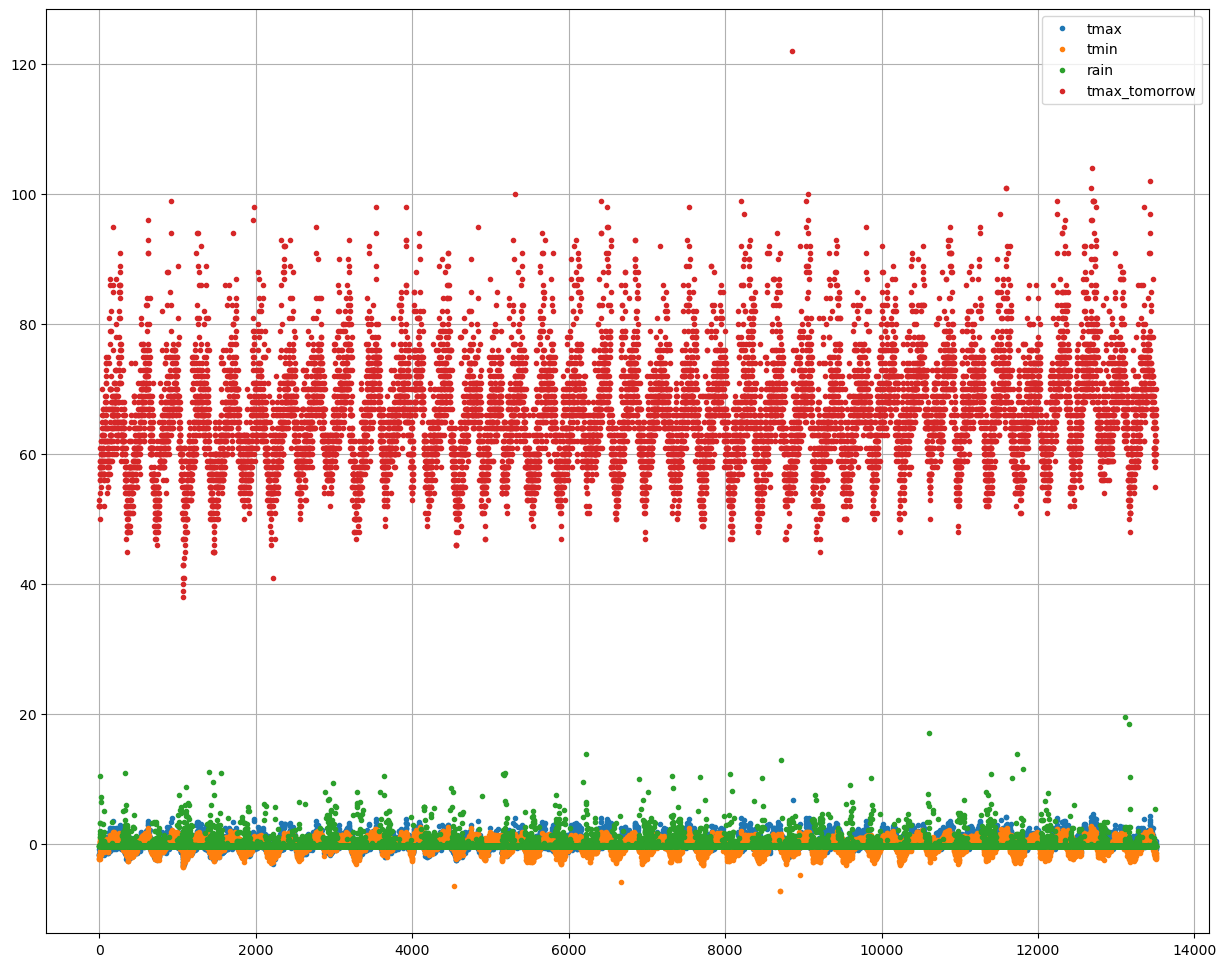

In [596]:
fig, ax = plt.subplots(figsize = (15,12))
data.plot( style=".", ax = ax);
ax.grid()

In [597]:
test_y.shape

(2027, 1)

In [600]:
t1 = np.reshape(test_y,(2027,))

In [602]:
data1 = {'tmax_tomorrow':t1}

In [604]:
df1 = pd.DataFrame(data1)

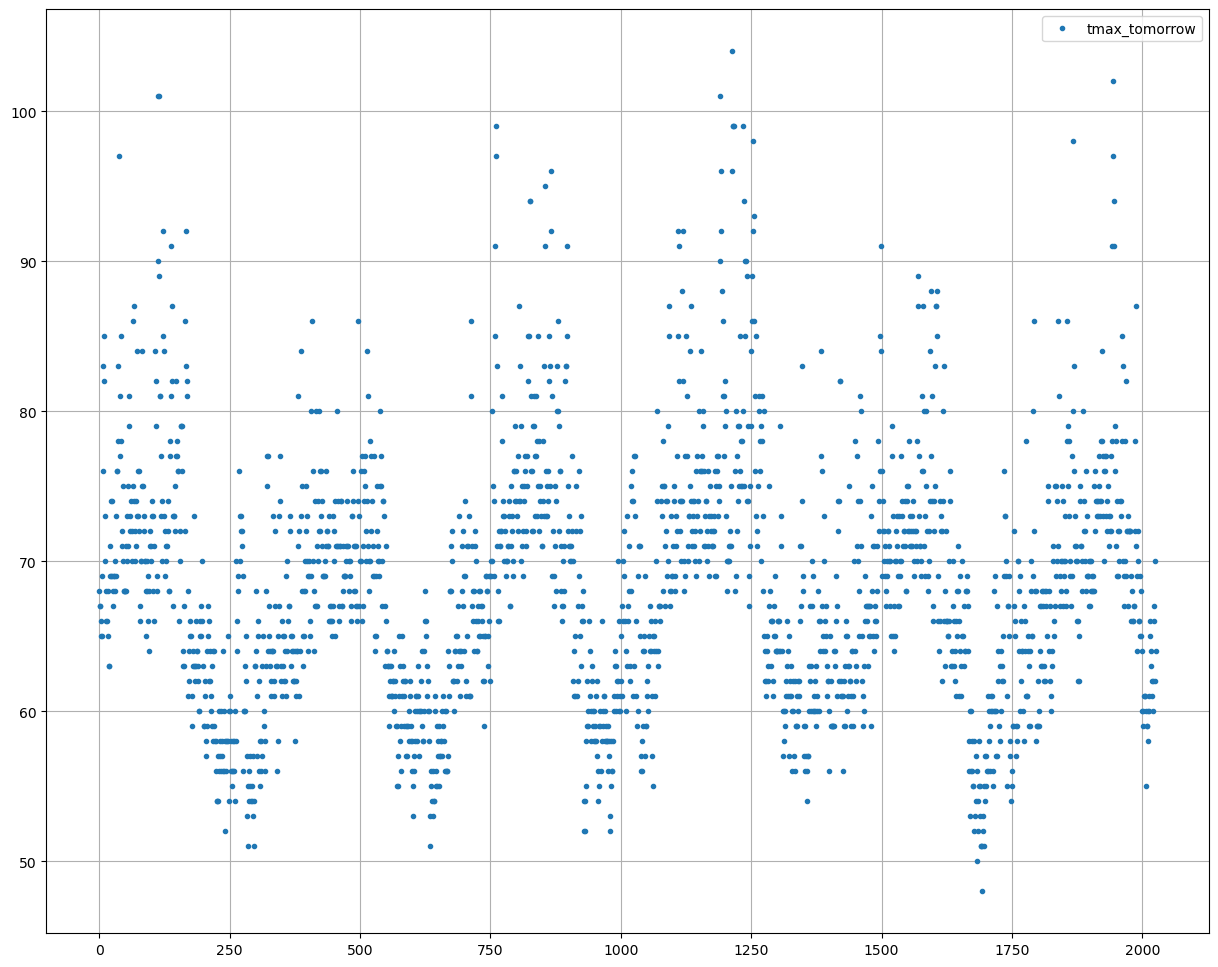

In [606]:
fig, ax = plt.subplots(figsize = (15,12))
df1.plot( style=".", ax = ax);
ax.grid()

In [608]:
valid_y.shape 

(2026, 1)

In [610]:
valid_y = np.reshape(valid_y,(2026,))

In [612]:
valid_y.shape 

(2026,)

In [614]:
train_y.shape

(9456, 1)

In [616]:
train_y = np.reshape(train_y,(9456,))

In [618]:
train_y.shape

(9456,)

In [620]:
train_x.shape

(9456, 3)

In [622]:
train_x = np.expand_dims(train_x, axis=-1) 

In [624]:
train_x.shape

(9456, 3, 1)

In [626]:
#train_y = np.expand_dims(train_y, axis=-1) 

In [628]:
#train_y.shape

In [630]:
train_y[20]

62.0

In [632]:
valid_x = np.expand_dims(valid_x, axis=-1) 

In [634]:
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape = (3,1)))
model.add(tf.keras.layers.SimpleRNN(2))
#model.add(tf.keras.layers.Dense(218,activation = 'tanh'))
#model.add(tf.keras.layers.Dense(128,activation = 'relu'))
model.add(tf.keras.layers.Dense(1))

In [636]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_5 (SimpleRNN)             │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (44.00 B)

 Trainable params: 11 (44.00 B)

 Non-trainable params: 0 (0.00 B)

In [638]:
from tensorflow.keras.utils import plot_model

# 使用模型的公开 name 属性，或给出默认文件名
plot_model(
    model,
    to_file=(model.name if hasattr(model, 'name') else 'sequential_model') + '.png',
    show_shapes=True,
    show_layer_names=True
)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [640]:
model.compile(optimizer='adam',
              loss='mse',
              metrics= ['mean_absolute_error'])

In [642]:
hist = model.fit(train_x,
         train_y,
         batch_size=64,
         epochs=100,
         verbose=1,        
         validation_data=(valid_x, valid_y))

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4368.3418 - mean_absolute_error: 65.5347 - val_loss: 4537.3662 - val_mean_absolute_error: 66.8844
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 4290.3926 - mean_absolute_error: 64.9532 - val_loss: 4430.5063 - val_mean_absolute_error: 66.0997
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step - loss: 4159.6260 - mean_absolute_error: 63.9553 - val_loss: 4241.9756 - val_mean_absolute_error: 64.6740
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 3952.3657 - mean_absolute_error: 62.3411 - val_loss: 4085.6394 - val_mean_absolute_error: 63.4478
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - loss: 3812.0317 - mean_absolute_error: 61.1747 - val_loss: 3996.0129 - val_mean_absolute_error: 62.7365
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 3738.7898 - mean_absolute_error: 60.5715 - val_loss: 3923.1189 - val_mean_absolute_error: 62.1525
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━

In [644]:
hist_df=pd.DataFrame(hist.history)

In [646]:
hist_df.head()

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,4335.647949,65.289841,4537.366211,66.884422
1,4257.542969,64.704613,4430.506348,66.099716
2,4112.727539,63.598278,4241.975586,64.674026
3,3913.479736,62.010147,4085.639404,63.447773
4,3796.359619,61.053028,3996.012939,62.736465


Text(0, 0.5, 'Loss')

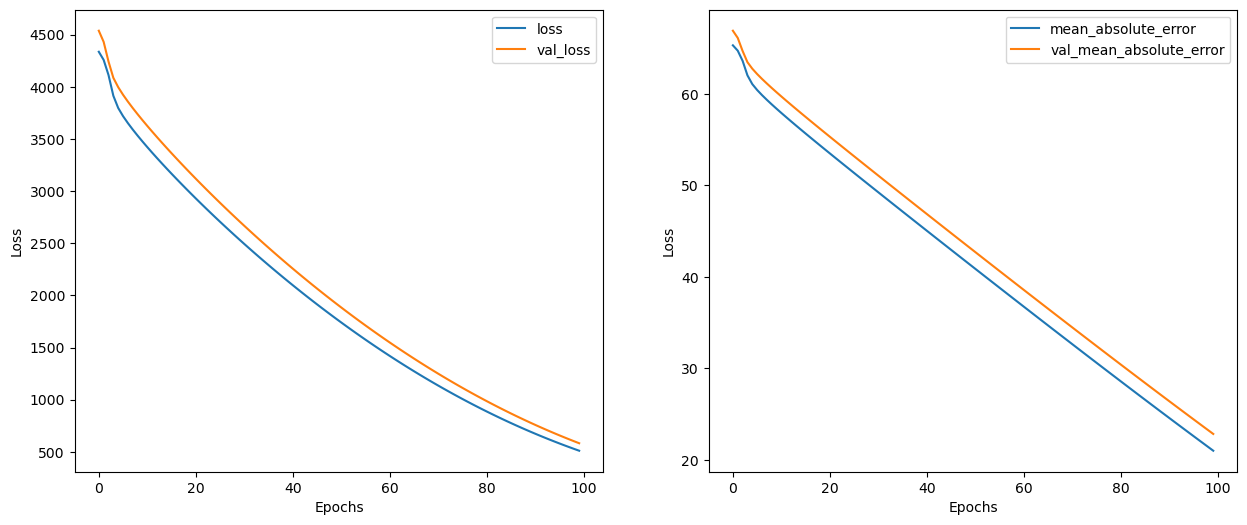

In [648]:
#Plotting
fig, axes = plt.subplots(1,2 , figsize = (15,6))

#Loss
ax = axes[0]
hist_df.plot(y = ['loss','val_loss'], ax = ax)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

#RMSE
ax1 = axes[1]
hist_df.plot(y = ['mean_absolute_error', 'val_mean_absolute_error'], ax = ax1)
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")

In [650]:
test_x = np.expand_dims(test_x, axis=-1) 

In [652]:
test_x.shape

(2027, 3, 1)

In [654]:
test_y.shape

(2027, 1)

In [656]:
test_y = np.reshape(test_y,(2027,))

In [658]:
test_y.shape

(2027,)

In [660]:
#test_y = np.expand_dims(test_y, axis=1) 

In [662]:
test_loss, test_RMSE = model.evaluate(test_x,  test_y, verbose=1)

print('Loss_RMSE:', test_RMSE)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 649.4343 - mean_absolute_error: 24.0885
Loss_RMSE: 23.898906707763672


In [664]:
y_pred = model.predict(test_x)
#y_pred1 = np.append(y_pred)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [665]:
y_pred.shape

(2027, 1)

In [668]:
y_p = np.reshape(y_pred,(2027,))

In [670]:
data1 = {'tamx':t1, 'T_Predic':y_p}

In [672]:
df1 = pd.DataFrame(data1)

In [674]:
df1.shape

(2027, 2)

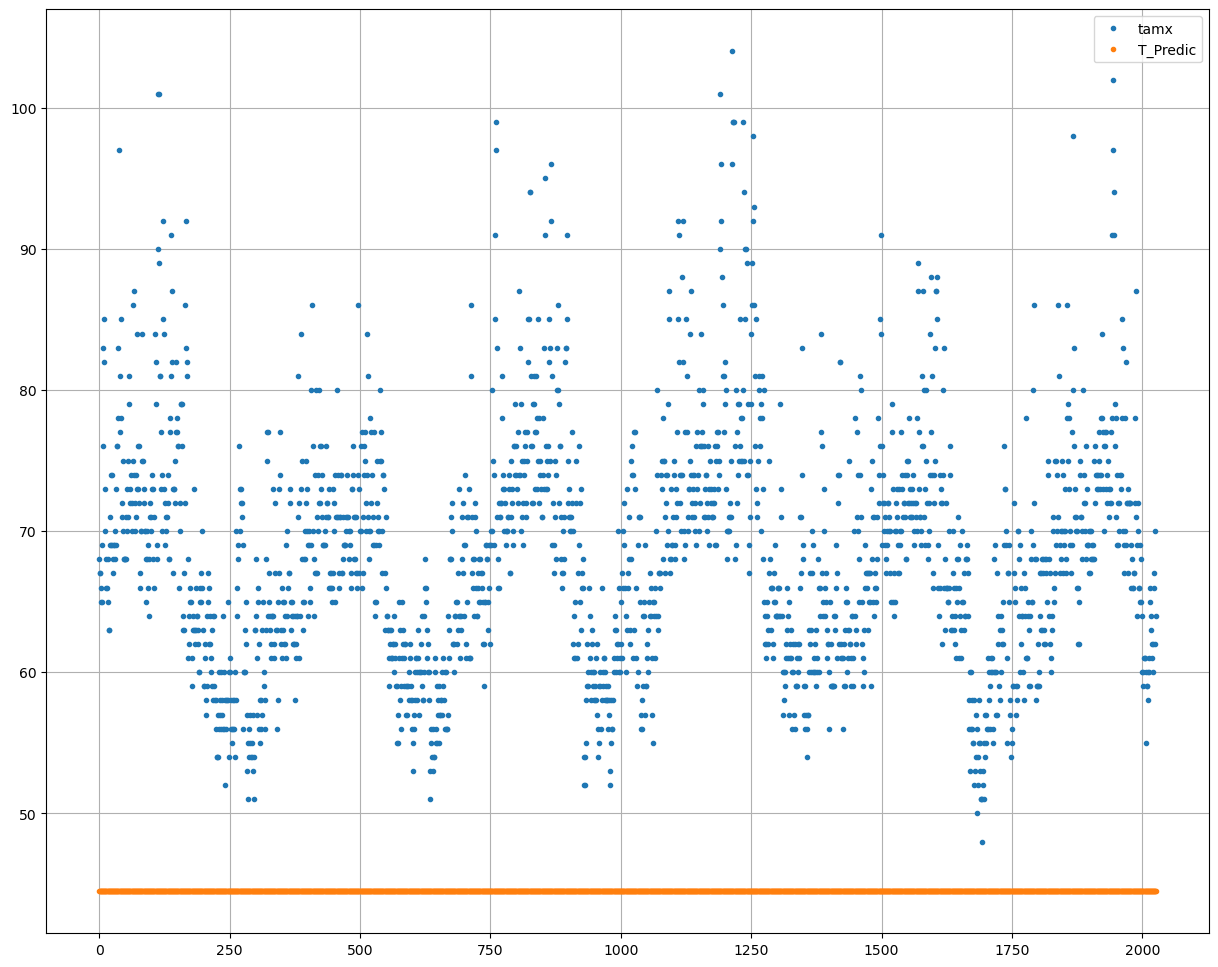

In [676]:
fig, ax = plt.subplots(figsize = (15,12))
df1.plot( y=['tamx','T_Predic'],style=".", ax = ax);
ax.grid()

In [678]:
df1.head()

,tamx,T_Predic
0,68.0,44.480980
1,67.0,44.480980
2,67.0,44.480984
3,65.0,44.480980
4,66.0,44.480980


In [680]:
model.layers[0].get_weights()

[array([[0.01467875, 0.0224174 ]], dtype=float32),
 array([[-2.0708199, -3.322508 ],
        [-3.382441 , -2.4047768]], dtype=float32),
 array([-1.4680437, -1.2079178], dtype=float32)]

In [682]:
model.layers[0].get_weights()[0]

array([[0.01467875, 0.0224174 ]], dtype=float32)

In [684]:
model.layers[0].get_weights()[1]

array([[-2.0708199, -3.322508 ],
       [-3.382441 , -2.4047768]], dtype=float32)

In [686]:
model.layers[0].get_weights()[2]

array([-1.4680437, -1.2079178], dtype=float32)

In [688]:
model.layers[0].get_weights()[2]

array([-1.4680437, -1.2079178], dtype=float32)

In [690]:
model.layers[1].get_weights()

[array([[-15.138331],
        [-15.545032]], dtype=float32),
 array([13.797677], dtype=float32)]

In [ ]:
#-----------------------------------------------------------------------------------------------------
#4，5   5 is 4 loop->100
#-----------------------------------------------------------------------------------------------------

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_28 (SimpleRNN)            │ (None, 1024)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,053,697 (4.02 MB)

 Trainable params: 1,053,697 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2963.1001 - mae: 50.4826 - val_loss: 21.2018 - val_mae: 3.4815
Epoch 2/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 23.2851 - mae: 3.4974 - val_loss: 21.8698 - val_mae: 3.5416
Epoch 3/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 21.9426 - mae: 3.4608 - val_loss: 21.2236 - val_mae: 3.4710
Epoch 4/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.3398 - mae: 3.4823 - val_loss: 21.3632 - val_mae: 3.5015
Epoch 5/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 22.2061 - mae: 3.4744 - val_loss: 21.1246 - val_mae: 3.4638
Epoch 6/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.4392 - mae: 3.4491 - val_loss: 21.2231 - val_mae: 3.4960
Epoch 7/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.1660 - mae: 3.4603 - val_loss: 21.1860 - val_mae: 3.4621
Epoch 8/50
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.3231 - mae: 3.4749 - val_loss: 21.0936 - val_mae: 3.4777
Epoch 9/50
296/296 ━━━━━━━━━━━━━━━━━━

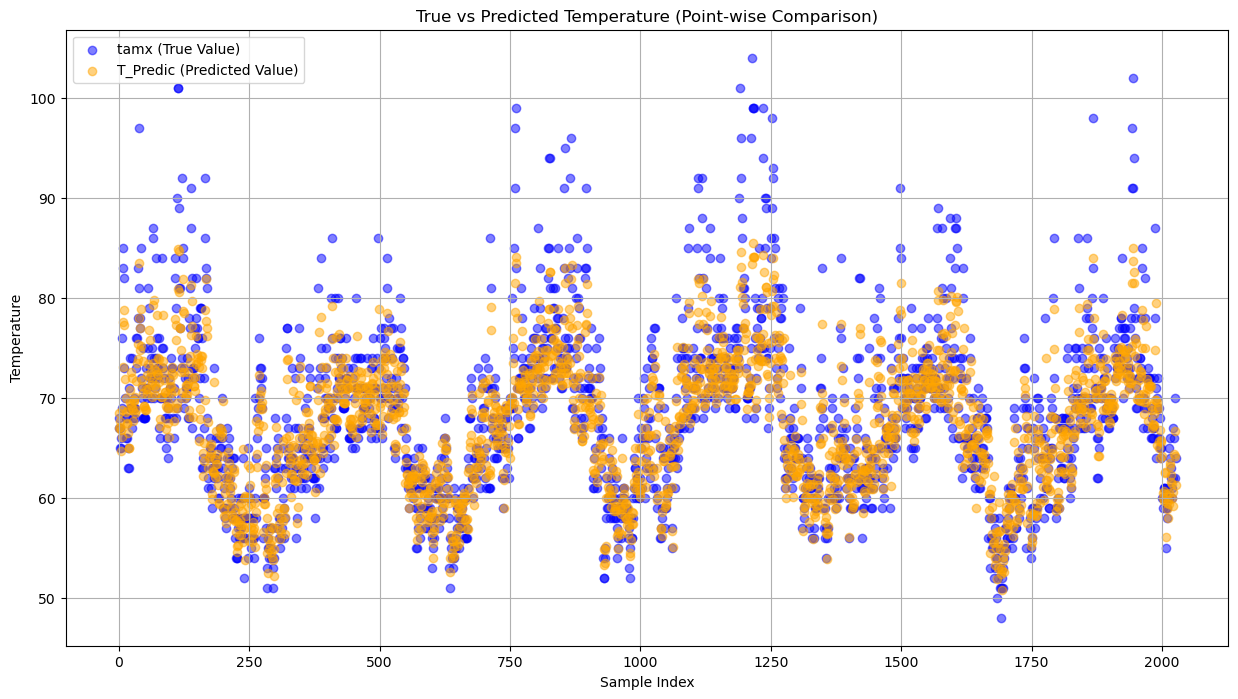

In [818]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 假设你的数据在 DataFrame `data` 中，初始化 PREDICTORS 和 TARGET
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# 1. 数据标准化
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

# 2. 数据拆分为训练集、验证集和测试集
np.random.seed(0)  # 确保随机性一致
split_data = np.split(data, [int(0.7 * len(data)), int(0.85 * len(data))])

# 分别提取特征和目标，并将数据转换为 NumPy 数组
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [
    [d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data
]

# 3. 调整输入数据的形状 (样本数, 时间步, 特征数)
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
valid_x = valid_x.reshape((valid_x.shape[0], 1, valid_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

# 4. 构建单层 RNN 模型：1024 单元
model = Sequential([
    SimpleRNN(1024, input_shape=(1, len(PREDICTORS)), return_sequences=False),  # 单层 RNN
    Dense(1)  # 输出层
])

# 5. 编译模型
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. 查看模型结构
model.summary()

# 7. 训练模型，设置 epoch = 100
history = model.fit(
    train_x, train_y,
    validation_data=(valid_x, valid_y),
    epochs=50, batch_size=32
)

# 8. 打印训练过程中的 Loss 和 MAE
print("Loss and MAE values:")
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

for i in range(5):
    print(f"{i}: Loss = {loss[i]:.4f}, MAE = {mae[i]:.4f}, Val_Loss = {val_loss[i]:.4f}, Val_MAE = {val_mae[i]:.4f}")

# 9. 使用模型预测测试数据
predictions = model.predict(test_x)

# 10. 将真实值和预测值存入 DataFrame
df_result = pd.DataFrame({
    'tamx': test_y.flatten(),
    'T_Predic': predictions.flatten()
})

# 打印部分结果
print(df_result.head())

# 11. 绘制真实值与预测值的散点图
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df_result.index, y=df_result['tamx'], label='tamx (True Value)', alpha=0.5, color='blue')
ax.scatter(x=df_result.index, y=df_result['T_Predic'], label='T_Predic (Predicted Value)', alpha=0.5, color='orange')

# 设置图例、标题和标签
ax.set_xlabel('Sample Index')
ax.set_ylabel('Temperature')
ax.set_title('True vs Predicted Temperature (Point-wise Comparison)')
ax.grid(True)
ax.legend()

# 显示图表
plt.show()


In [820]:
# 打印训练过程中的损失和误差
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

print("Loss and MAE values:")
for i in range(5):
    print(f"{i}: Loss = {loss[i]:.4f}, MAE = {mae[i]:.4f}, Val_Loss = {val_loss[i]:.4f}, Val_MAE = {val_mae[i]:.4f}")


Loss and MAE values:
0: Loss = 1537.2689, MAE = 30.4590, Val_Loss = 21.2018, Val_MAE = 3.4815
1: Loss = 22.1574, MAE = 3.4482, Val_Loss = 21.8698, Val_MAE = 3.5416
2: Loss = 22.1267, MAE = 3.4472, Val_Loss = 21.2236, Val_MAE = 3.4710
3: Loss = 22.1476, MAE = 3.4541, Val_Loss = 21.3632, Val_MAE = 3.5015
4: Loss = 22.1491, MAE = 3.4497, Val_Loss = 21.1246, Val_MAE = 3.4638


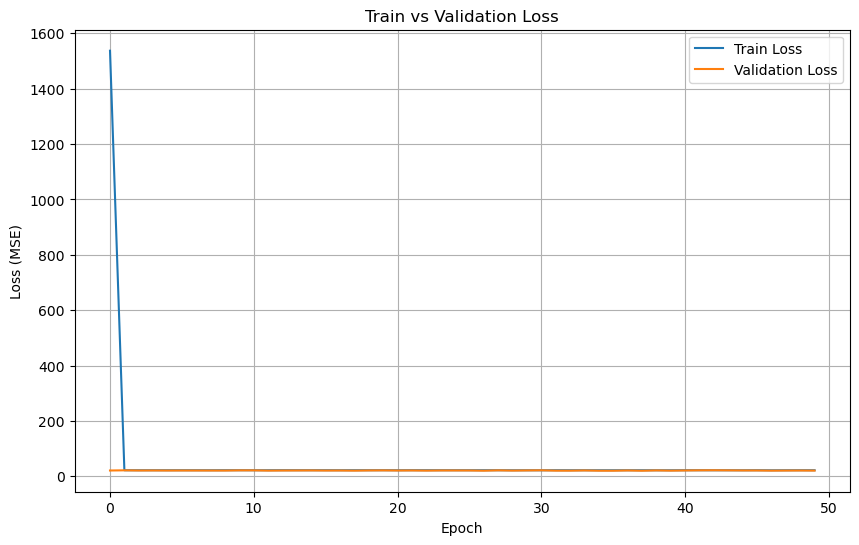

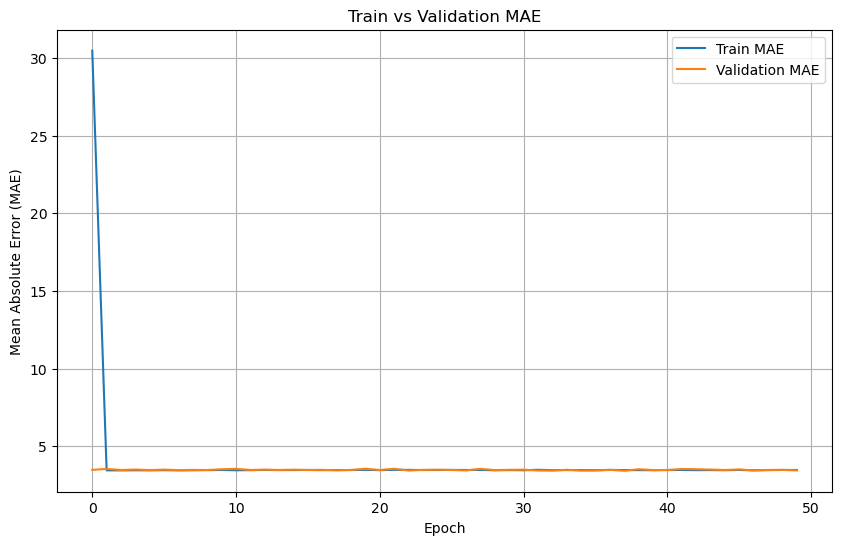

In [822]:
import matplotlib.pyplot as plt

# 1. 绘制 Loss 曲线（训练与验证）
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Train vs Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# 2. 绘制 MAE 曲线（训练与验证）
def plot_mae(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Train vs Validation MAE')
    plt.legend()
    plt.grid(True)
    plt.show()

# 调用绘图函数
plot_loss(history)
plot_mae(history)


C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_23 (SimpleRNN)            │ (None, 1, 1024)             │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 1, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_24 (SimpleRNN)            │ (None, 1, 64)               │          69,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_25 (SimpleRNN)            │ (None, 32)                  │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,125,505 (4.29 MB)

 Trainable params: 1,125,505 (4.29 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3355.0732 - mae: 57.1421 - val_loss: 2491.8657 - val_mae: 49.3117
Epoch 2/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2106.4299 - mae: 45.0438 - val_loss: 1704.0940 - val_mae: 40.5447
Epoch 3/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1416.6975 - mae: 36.5638 - val_loss: 1135.4896 - val_mae: 32.7913
Epoch 4/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 923.5738 - mae: 29.0288 - val_loss: 734.2147 - val_mae: 25.9614
Epoch 5/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 591.8582 - mae: 22.5402 - val_loss: 463.4873 - val_mae: 20.0815
Epoch 6/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 366.8085 - mae: 16.8329 - val_loss: 289.3907 - val_mae: 15.1750
Epoch 7/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 240.4893 - mae: 12.8141 - val_loss: 184.3743 - val_mae: 11.4625
Epoch 8/100
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 160.3630 - mae: 10.0582 - val_loss: 124.7580 - val_mae: 9.

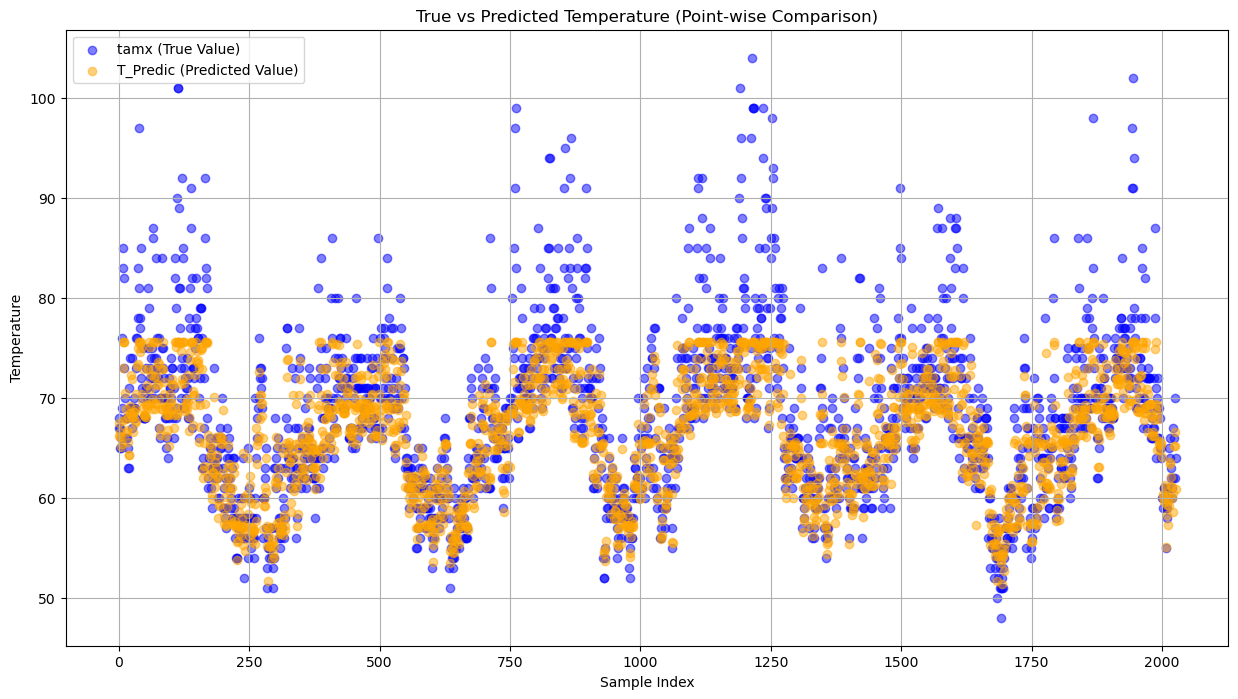

In [794]:
#-----------------6------------------
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 假设你的数据在 DataFrame `data` 中，初始化 PREDICTORS 和 TARGET
PREDICTORS = ["tmax", "tmin", "rain"]
TARGET = "tmax_tomorrow"

# 1. 数据标准化
scaler = StandardScaler()
data[PREDICTORS] = scaler.fit_transform(data[PREDICTORS])

# 2. 数据拆分为训练集、验证集和测试集
np.random.seed(0)  # 确保随机性一致
split_data = np.split(data, [int(0.7 * len(data)), int(0.85 * len(data))])

# 分别提取特征和目标，并将数据转换为 NumPy 数组
(train_x, train_y), (valid_x, valid_y), (test_x, test_y) = [
    [d[PREDICTORS].to_numpy(), d[[TARGET]].to_numpy()] for d in split_data
]

# 3. 调整输入数据的形状 (样本数, 时间步, 特征数)
train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
valid_x = valid_x.reshape((valid_x.shape[0], 1, valid_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

# 4. 构建模型：第一层 1024 单元，后续增加两层 RNN
model = Sequential([
    SimpleRNN(1024, input_shape=(1, len(PREDICTORS)), return_sequences=True),
    Dropout(0.2),  # Dropout 防止过拟合
    
    # 第二层 RNN，64 个单元
    SimpleRNN(64, return_sequences=True),
    Dropout(0.2),

    # 第三层 RNN，32 个单元
    SimpleRNN(32, return_sequences=False),
    Dropout(0.2),

    # 输出层
    Dense(1)
])

# 5. 编译模型
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 6. 查看模型结构
model.summary()

# 7. 训练模型，设置 epoch = 100
history = model.fit(
    train_x, train_y,
    validation_data=(valid_x, valid_y),
    epochs=100, batch_size=32
)

# 8. 打印训练过程中的 Loss 和 MAE
print("Loss and MAE values:")
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

for i in range(5):
    print(f"{i}: Loss = {loss[i]:.4f}, MAE = {mae[i]:.4f}, Val_Loss = {val_loss[i]:.4f}, Val_MAE = {val_mae[i]:.4f}")

# 9. 使用模型预测测试数据
predictions = model.predict(test_x)

# 10. 将真实值和预测值存入 DataFrame
df_result = pd.DataFrame({
    'tamx': test_y.flatten(),
    'T_Predic': predictions.flatten()
})

# 打印部分结果
print(df_result.head())

# 11. 绘制真实值与预测值的散点图
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df_result.index, y=df_result['tamx'], label='tamx (True Value)', alpha=0.5, color='blue')
ax.scatter(x=df_result.index, y=df_result['T_Predic'], label='T_Predic (Predicted Value)', alpha=0.5, color='orange')

# 设置图例、标题和标签
ax.set_xlabel('Sample Index')
ax.set_ylabel('Temperature')
ax.set_title('True vs Predicted Temperature (Point-wise Comparison)')
ax.grid(True)
ax.legend()

# 显示图表
plt.show()


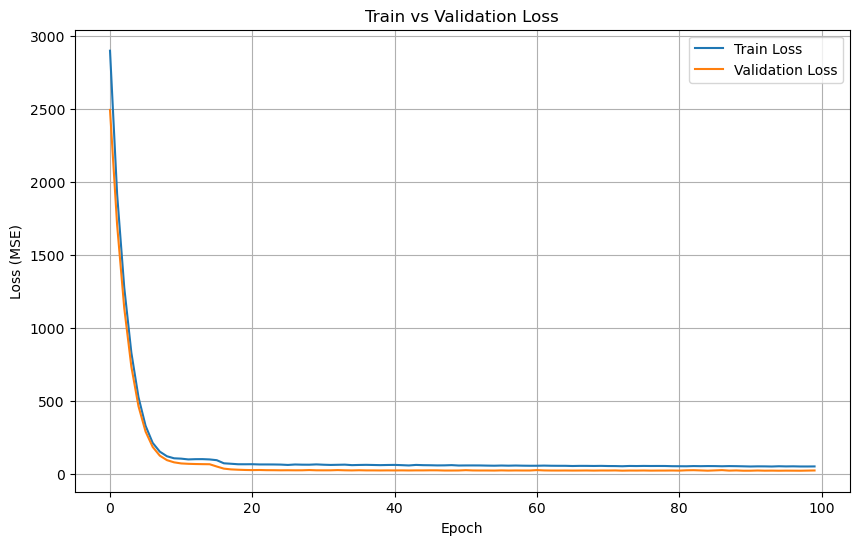

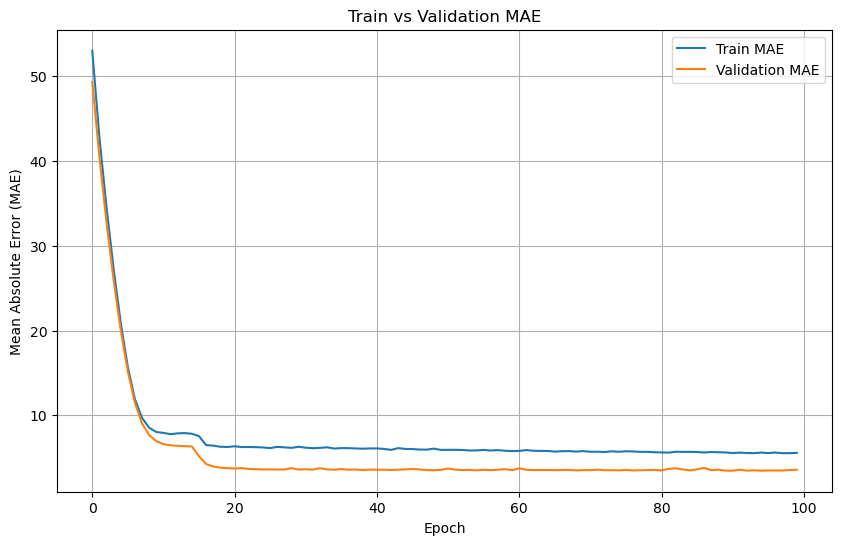

In [800]:
import matplotlib.pyplot as plt

# 1. 绘制 Loss 曲线（训练与验证）
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Train vs Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# 2. 绘制 MAE 曲线（训练与验证）
def plot_mae(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['mae'], label='Train MAE')
    plt.plot(history.history['val_mae'], label='Validation MAE')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error (MAE)')
    plt.title('Train vs Validation MAE')
    plt.legend()
    plt.grid(True)
    plt.show()

# 调用绘图函数
plot_loss(history)
plot_mae(history)
